In [1]:
# data processing packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# deep learning packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

# model evaluation packages
from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

# plot packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# load data
path = '/Users/yunxuanli/Documents/Caltechphd/research/DarkMatter/darkphoton_learning/candidate_selection/data/'
signal_2l = pd.read_hdf(path+'signaltable_2l.hdf', 'signal')
signal_4l = pd.read_hdf(path+'signaltable_4l.hdf', 'signal')
signal_6l = pd.read_hdf(path+'signaltable_6l.hdf', 'signal')
signal = pd.concat([signal_2l, signal_4l, signal_6l], ignore_index=True)


Using Theano backend.


In [2]:
# separate datasets to explore, train, valid, test, backup
index_list = np.unique(signal.eid)
index_list, index_explore = train_test_split(index_list, test_size = 100000, random_state=42)
index_list, index_train = train_test_split(index_list, test_size = 500000, random_state=42)
index_list, index_valid = train_test_split(index_list, test_size = 100000, random_state=42)
index_backup, index_test = train_test_split(index_list, test_size = 100000, random_state=42)

signal_explore = signal[signal.eid.isin(index_explore)]
signal_train = signal[signal.eid.isin(index_train)]
signal_valid = signal[signal.eid.isin(index_valid)]
signal_test = signal[signal.eid.isin(index_test)]
signal_backup = signal[signal.eid.isin(index_backup)]

signal_explore.to_hdf('./data/signal_explore.hdf','signal')
signal_train.to_hdf('./data/signal_train.hdf','signal')
signal_valid.to_hdf('./data/signal_valid.hdf','signal')
signal_test.to_hdf('./data/signal_test.hdf','signal')
signal_backup.to_hdf('./data/signal_backup.hdf','signal')

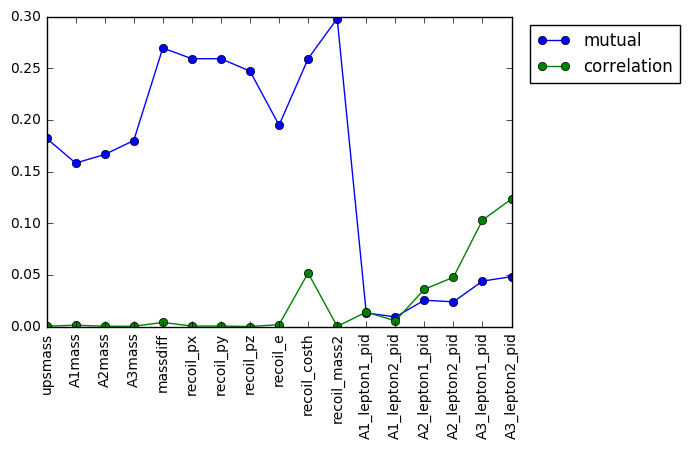

In [9]:
# separate to train and test sets
feature_name = signal.columns.tolist()
feature_name.remove('eid')
feature_name.remove('truth_matching')
feature_name.remove('upsmcmass')
feature_name.remove('A1mcmass')
feature_name.remove('A2mcmass')
feature_name.remove('A3mcmass')

X_explore = signal_explore[feature_name]
y_explore = signal_explore['truth_matching']

# mutual_score
# problem: difference between mutual information and AUC

mutual = []
correlation = []
for attr in feature_name:
    mutual.append(mutual_info_score(X_explore[attr], y_explore))
    correlation.append(abs(pearsonr(X_explore[attr], y_explore)[0]))

plt.plot(range(len(feature_name)), mutual, '-o', label='mutual')
plt.plot(range(len(feature_name)), correlation, '-o', label='correlation')
plt.xticks(range(len(feature_name)), feature_name, rotation='vertical')
plt.legend(bbox_to_anchor=[1.38,1])